In [1]:
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
pd_data = pd.read_csv('Reviews.csv')
pd_data = pd_data[:10000]
pd_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# 1. Top-10 Reviewer

In [3]:
df = pd_data.groupby(['UserId', 'ProfileName'])['Score'].count()
df = df.reset_index()
df.rename(columns={'Score': 'Score count'}, inplace=True)
df.sort_values(['Score count'], ascending=False, inplace=True)

In [4]:
mean_df = pd_data.groupby(['UserId', 'ProfileName'])['Score'].mean()
mean_df = mean_df.reset_index()
mean_df.rename(columns={'Score': 'Score mean'}, inplace=True)
mean_df.sort_values(['Score mean'], ascending=False, inplace=True)
df['Score mean'] = mean_df['Score mean']
df.head(10)

,UserId,ProfileName,Score count,Score mean
2330,A1Z54EM24Y40LL,c2,17,3.882353
4286,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
5169,A35R32TA60XD57,M. Torma,9,4.111111
2919,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
6442,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
6330,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6493,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
8390,AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
2826,A26NFIQ7KWI8Y7,kt rose,6,2.666667
31,A10H24TDLK2VDP,William Jens Jensen,6,3.000000


# 2. Plot score distribution for the user with the most number of reviews

In [5]:
import matplotlib.pyplot as plt
import numpy as np

most_reviewer = df['UserId'].iloc[0]
reviews_of_most_reviewer = pd_data.loc[pd_data['UserId'] == most_reviewer]
scores_of_mostReviever = reviews_of_most_reviewer['Score']

In [6]:
distribution = np.empty(5)
for score in scores_of_mostReviever:
    distribution[score-1] += 1
distribution

array([1., 1., 4., 4., 7.])

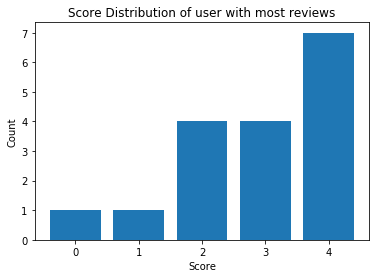

In [7]:
x_pos = np.arange(len(distribution))
plt.bar(x_pos, distribution, align='center')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score Distribution of user with most reviews')
plt.show()

# 3. Plot pandas Series DataFrame (Time->Date)

In [8]:
import collections
date = pd.to_datetime(pd_data['Time'],unit='s')
# date.hist(bins=10)
date = date.dt.year

year_dict = {}
for year in date:
    if year in year_dict:
        year_dict[year] += 1
    else:
        year_dict[year] = 1
year_dict = collections.OrderedDict(sorted(year_dict.items(), key=lambda d: d[0]))

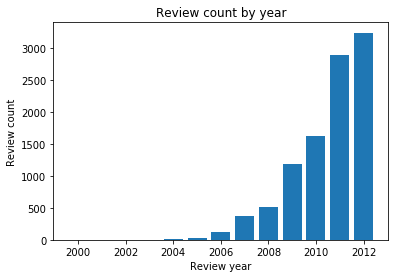

In [9]:
y_pos = list(year_dict.values())
x_pos = list(year_dict.keys())
plt.bar(x_pos, y_pos, align='center')
plt.xlabel('Review year')
plt.ylabel('Review count')
plt.title('Review count by year')
plt.show()

# 4. Plot HeatMap using seaborn

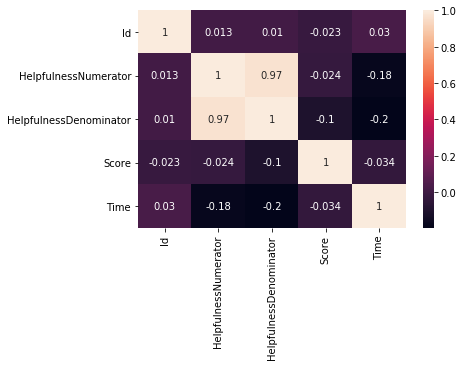

In [10]:
import seaborn as sns

correlation = pd_data.corr()
sns.heatmap(correlation, annot=True, cbar=True)

# 5. Helpful percent

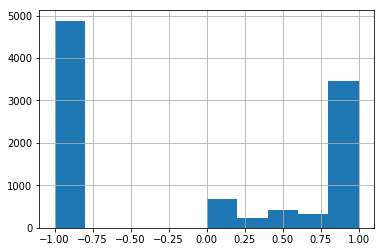

In [11]:
helpful_data = pd_data[['HelpfulnessNumerator', 'HelpfulnessDenominator']]
helpful_data['Helpful percent'] = helpful_data['HelpfulnessNumerator'] / helpful_data['HelpfulnessDenominator']
helpful_data.fillna(-1, inplace=True)
helpful_data['Helpful percent'].hist()